#TensorFlow Tutorial - ML Course (Colman)

Adapted by [Yossi Adi](http://adiyoss.github.io/) from the TensorFlow tutorial.

## Introduction

In this tutorials we will present [TensorFlow](https://www.tensorflow.org/), which is an open source software library for numerical computation using data flow graphs. We will demonstrate how to define and train neural network models for multi-class classification problems.

In this tutorial, we will train:
* Logistic Regression Model
* One-Hidden Layer Neural Network Model
* Convolutional Neural Network Model

We will train all of which on MNIST dataset.

## TensorFlow

TensorFlow™ is an open source software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API. TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well.

TensorFlow is a programming system in which you represent computations as graphs. Nodes in the graph are called ops (short for operations). An op takes zero or more Tensors, performs some computation, and produces zero or more Tensors. In TensorFlow terminology, a Tensor is a typed multi-dimensional array. For example, you can represent a mini-batch of images as a 4-D array of floating point numbers with dimensions [batch, height, width, channels].

Let's take a look on how the computation graph is composed

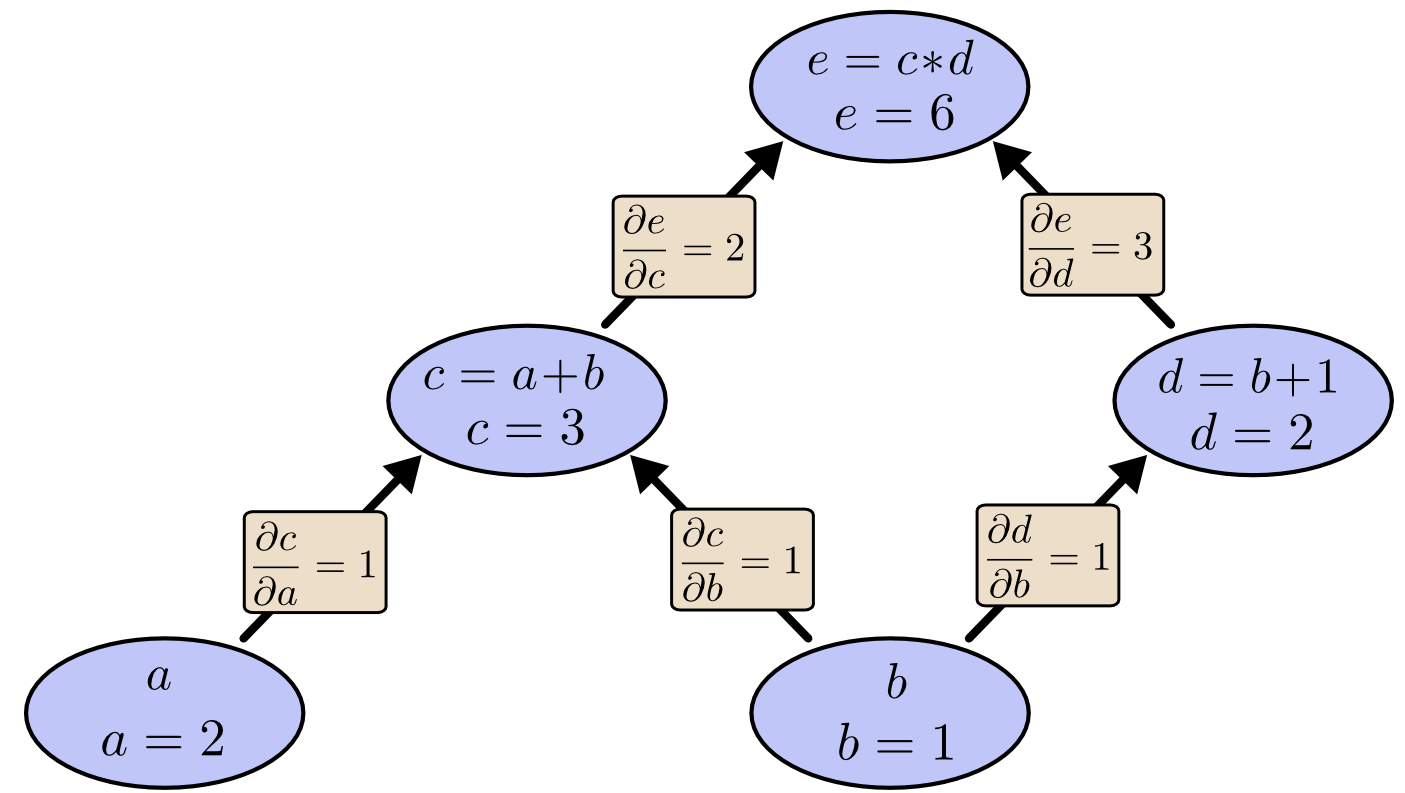

In [239]:
from IPython.display import Image
Image(filename='pics/tree-eval-derivs.png', width=800, height=500) 

## Data - MNIST

In [240]:
%matplotlib inline
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

# read the data and labels as ont-hot vectors
# one-hot means a sparse vector for every observation where only
# the class label is 1, and every other class is 0.
# more info here:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(55000, 10000, 5000)
((55000, 784), (55000, 10))
(0.0, 1.0)


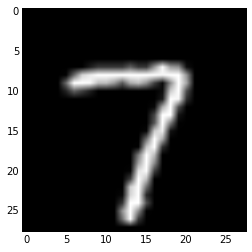

In [241]:
# mnist is now a DataSet with accessors for:
#'train', 'test', and 'validation'.
# within each, we can access:
# images, labels, and num_examples
print(mnist.train.num_examples,
      mnist.test.num_examples,
      mnist.validation.num_examples)

# the images are stored as:
# n_observations x n_features tensor (n-dim array)
# the labels are stored as n_observations x n_labels,
# where each observation is a one-hot vector.
print(mnist.train.images.shape, mnist.train.labels.shape)

# the range of the values of the images is from 0-1
print(np.min(mnist.train.images), np.max(mnist.train.images))

# we can visualize any one of the images by reshaping it to a 28x28 image
plt.imshow(np.reshape(mnist.train.images[100, :], (28, 28)), cmap='gray')

## Model 1 - Logistic Regression

The first model will be a standard linear model called Logistic Regression. It is very similar to the Perceptron algorithm we've met in the our last lab.
The model will be one linear layer, and we will optimize the cross-entropy loss function.

We start by creating place holders for the data

In [298]:
# We allow the first dimension to be None, since this will eventually
# represent our mini-batches, or how many images we feed into a network
# at a time during training/validation/testing.
# The second dimension is the number of features that the image has.

# We start
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])

# We'll create a placeholder for the true output of the network
y_true = tf.placeholder(tf.float32, [None, 10])

Than we define the model

We can write a simple regression $y = softmax(W \cdot x + b)$ as:

In [299]:
W = tf.Variable(tf.truncated_normal ([n_input, n_output]))
b = tf.Variable(tf.truncated_normal ([n_output]))
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b)

# prediction and actual using the argmax as the predicted label
correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))

# And now we can look at the mean of our network's correct guesses
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Recall, our loss function is the cross entropy:

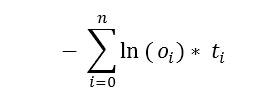

In [300]:
Image(filename='pics/ce.jpg', width=350, height=180) 

In [301]:
# And then write our loss function:
cross_entropy = -tf.reduce_sum(y_true * tf.log(net_output))

Now, we need to define the optimization technique we will use. There are different optimization algorithms we can use but most of them are different variants of the [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). 

The basics of SGD is: 
* Choose an initial vector of parameters $\displaystyle{w}$ and learning rate ${\displaystyle \eta }$
* Repeat until an approximate minimum is obtained:
    * Randomly shuffle examples in the training set
    * For ${\displaystyle i=1,2,...,n}$, do:
        * $\!w_{i+1}:=w_{i}-\eta \nabla(w_{i})$.

Where $\nabla(w_{i})$ is the gradient of the loss function with respect to the parameters

In [302]:
# We can tell the tensorflow graph to train w/ gradient descent using
# our loss function and an input learning rate
eta = 0.01
optimizer = tf.train.GradientDescentOptimizer(
    eta).minimize(cross_entropy)

Now we define a session variable which is the class that is responsible for the optimization of the graph with the defined optimizer, parameters and dataset.

In [303]:
# We now create a new session to actually perform the initialization the
# variables:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Let's Train!! (and print the accuracy on the validation set every epoch)

In [304]:
# Now actually do some training:
batch_size = 100
n_epochs = 10
l_loss = list()
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    loss = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels})
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    l_loss.append(loss)

Validation accuracy for epoch 1 is: 0.878199994564
Validation accuracy for epoch 2 is: 0.899800002575
Validation accuracy for epoch 3 is: 0.903199970722
Validation accuracy for epoch 4 is: 0.905600011349
Validation accuracy for epoch 5 is: 0.915000021458
Validation accuracy for epoch 6 is: 0.91479998827
Validation accuracy for epoch 7 is: 0.912999987602
Validation accuracy for epoch 8 is: 0.915600001812
Validation accuracy for epoch 9 is: 0.912000000477
Validation accuracy for epoch 10 is: 0.910399973392


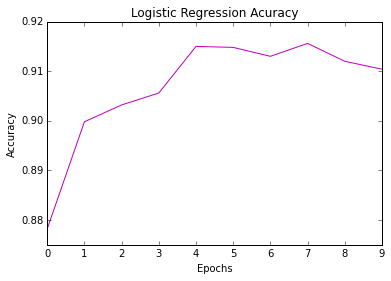

In [305]:
plt.title('Logistic Regression Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')
plt.show()

Let's Predict!! (using the test set)

In [306]:
# %% Print final test accuracy:
print("Accuracy for test set: {}". format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels
               })))

Accuracy for test set: 0.909500002861


## Model 2 - One-Hidden Layer Neural Network

Our next model will be One-Hidden Layer Neural Network also known as Multi-Layer Perceptron(MLP).

The size of the hidden layer will be 256 hidden units followed by a non-linear function (in this tutorial we will use the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function).
We will optimize again the cross-entropy, but this time we will use different optimization technique called [Adam](https://arxiv.org/pdf/1412.6980v8.pdf).

We start again with defining the place holders

In [313]:
# We start
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])

# %% We'll create a placeholder for the true output of the network
y_true = tf.placeholder(tf.float32, [None, 10])

Than, we define the model

We can write it as $y = softmax(W2 \cdot relu(W1 \cdot x + b1) + b2)$

In [314]:
hidden_size = 256
W1 = tf.Variable(tf.truncated_normal([n_input, hidden_size]))
b1 = tf.Variable(tf.truncated_normal([hidden_size]))

W2 = tf.Variable(tf.truncated_normal([hidden_size, n_output]))
b2 = tf.Variable(tf.truncated_normal([n_output]))
net_output = (tf.matmul(tf.nn.relu(tf.matmul(net_input, W1) + b1), W2) + b2)

# prediction and actual using the argmax as the predicted label
correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))

# And now we can look at the mean of our network's correct guesses
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

We use the same cross entropy loss function but instead of writing it by ourselves like we did before, we will use an internal TensorFlow function (softmax_cross_entropy_with_logits - implements softmax + log + cross entropy).

As for the optimization technique, we will get familiar with another optimizer called [Adam](https://arxiv.org/pdf/1412.6980v8.pdf) which is a varient of SGD.

In [315]:
# Define loss and optimizer
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(net_output, y_true))

eta = 0.01
optimizer = tf.train.AdamOptimizer(eta).minimize(cost)

Let's train and test our model!

In [316]:
# create a new session to actually perform the initialization the
# variables:
sess = tf.Session()
sess.run(tf.initialize_all_variables())
l_loss = list()

# train:
batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    loss = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    l_loss.append(loss)

Validation accuracy for epoch 1 is: 0.930999994278
Validation accuracy for epoch 2 is: 0.953199982643
Validation accuracy for epoch 3 is: 0.959200024605
Validation accuracy for epoch 4 is: 0.959200024605
Validation accuracy for epoch 5 is: 0.964800000191
Validation accuracy for epoch 6 is: 0.960600018501
Validation accuracy for epoch 7 is: 0.959800004959
Validation accuracy for epoch 8 is: 0.964600026608
Validation accuracy for epoch 9 is: 0.972999989986
Validation accuracy for epoch 10 is: 0.968400001526


Test the model:

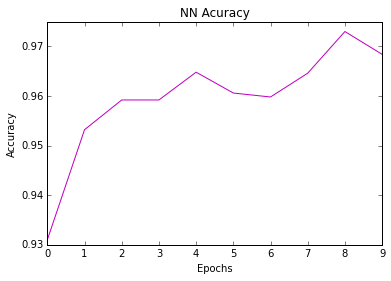

In [317]:
plt.title('NN Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')
plt.show()

In [318]:
# %% Print final test accuracy:
print("Accuracy for test set: {}".format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels
               })))

Accuracy for test set: 0.965300023556


## Model 3 - Convulotional Neural Network

Our last model will be Convulotional Neural Network (CNN).

We will define two layers of convulotionals with [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) activation function. Every convulotional layer will be followed by 2x2 max-pooling layer. 

Lastly, we will add two fully connected layers (same as in model 2) on top of the convulotional layers and [dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) layer between.
We will optimize the cross-entropy loss function using [Adam](https://arxiv.org/pdf/1412.6980v8.pdf).

Again, we start by defining the place holders

In [319]:
# We start
n_input = 784
n_output = 10

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

x_tensor = tf.reshape(x, [-1, 28, 28, 1])

In the following block we define functions for convolutions and pooling as well as function for parameters initialization.

In [320]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

# functions for parameter initialization 
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


We'll setup two convolutional layers

In [321]:
# Weight matrix is [height x width x input_channels x output_channels]
# Bias is [output_channels]
filter_size = 5
n_filters_1 = 16
n_filters_2 = 16

# parameters
W_conv1 = weight_variable([filter_size, filter_size, 1, n_filters_1])
b_conv1 = bias_variable([n_filters_1])
W_conv2 = weight_variable([filter_size, filter_size, n_filters_1, n_filters_2])
b_conv2 = bias_variable([n_filters_2])

# layers
h_conv1 = tf.nn.relu(conv2d(x_tensor, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

We'll now reshape the convolutional output so we can connect it to the fully-connected layers:

In [322]:
# 7x7 is the size of the image after the convolutional and pooling layers (28x28 -> 14x14 -> 7x7)
h_conv2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * n_filters_2])

In [323]:
# %% Create the one fully-connected layer:
n_fc = 1024
W_fc1 = weight_variable([7 * 7 * n_filters_2, n_fc])
b_fc1 = bias_variable([n_fc])
h_fc1 = tf.nn.relu(tf.matmul(h_conv2_flat, W_fc1) + b_fc1)

Let's define the dropout layer. 
We can add dropout for regularizing and to reduce overfitting like so:

In [324]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

And finally our softmax layer:

In [325]:
W_fc2 = weight_variable([n_fc, n_output])
b_fc2 = bias_variable([n_output])
y_pred = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Define loss functions

In [326]:
cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(y_pred, y))
optimizer = tf.train.AdamOptimizer().minimize(cross_entropy)

Monitor accuracy

In [327]:
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

We now create a new session to actually perform the initialization and train our model

In [ ]:
# variables:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [ ]:
# We'll train in minibatches and report accuracy:
batch_size = 100
n_epochs = 5
l_loss = list()
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            x: batch_xs, y: batch_ys, keep_prob: 0.5})
    loss = sess.run(accuracy, feed_dict={
                       x: mnist.validation.images,
                       y: mnist.validation.labels,
                       keep_prob: 1.0 })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    l_loss.append(loss)

In [ ]:
plt.title('NN Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')
plt.show()

Print final test accuracy:

In [238]:
print("Accuracy for test set: {}".format(sess.run(accuracy,
               feed_dict={
                   x: mnist.test.images,
                   y: mnist.test.labels,
                   keep_prob: 1.0
               })))

Accuracy for test set: 0.991900026798
